$$
\mu_d (\Delta \omega) \gamma m g + F_{\mathrm{air}}(v, \vartheta) = \frac{\gamma m v^2}{R} \frac{\cos \vartheta}{\frac{L}{R} + \sin \vartheta} \left(1 + \frac{L^2}{R^2} + 2 \frac{L}{R} \sin \vartheta \right)^{\frac{3}{2}}
$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy import optimize

In [122]:
def foo(theta, v, R, gamma, m, mu_d, L):
    g = 9.8
    # https://files.school-science.ru/pdf/5/34481.pdf
    Fair = 0.24 * 2 * v**2 * (1 + 3 * np.sin(theta))
    
    return mu_d * gamma * m * g + Fair - gamma*m*v**2/R * np.cos(theta)/(L/R + np.sin(theta)) * (1 + (L/R)**2 + 2 * L/R * np.sin(theta))**(3/2)

In [123]:
m = 1000  # [kg]
L = 4  # [m]
gamma = 0.5
mu_d = 0.6


R = 10  # [m]

# theta
tt = np.linspace(0, stop=np.pi/2 * 0.9, num=40)
vv = np.linspace(10, stop=150, num=50)

TT, VV = np.meshgrid(tt, vv, indexing='ij')

ZZ = foo(TT, VV, R, gamma, m, mu_d, L)

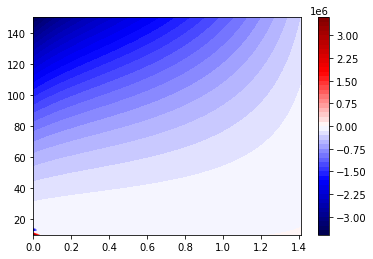

In [124]:
ZZ[0,0] = np.max(np.abs(ZZ))
ZZ[0,1] = -np.max(np.abs(ZZ))

plt.contourf(TT, VV, ZZ, cmap='seismic', levels=50)

plt.colorbar()
plt.show()

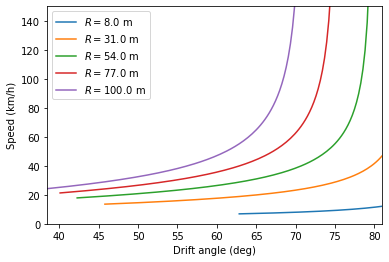

In [132]:
m = 1000  # [kg]
L = 4  # [m]
gamma = 0.5
mu_d = 0.6


RR = np.linspace(8, stop=100, num=5)
# theta
tt = np.linspace(0, stop=np.pi/2 * 0.9, num=300)

for R in RR:
    vv = np.array([])
    for theta in tt:
        v0 = 10
        solution = optimize.root(lambda z: foo(theta, z, R, gamma, m, mu_d, L), v0, method='hybr')
        vv = np.append(vv, [solution.x])

    vmin =  np.sqrt(mu_d * 9.8 * R)
    #vmax = 
    vv[vv < vmin] = np.nan
    
    plt.plot(tt/np.pi*180, vv, label='$R = {}$ m'.format(R))


#plt.plot(RR, np.sqrt(mu_d * 9.8 * RR), '--')
plt.margins(x=0)
plt.legend()
plt.ylabel('Speed (km/h)')
plt.xlabel('Drift angle (deg)')
plt.ylim(0, 150)
plt.show()

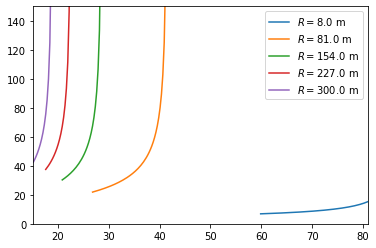

In [126]:
m = 1000  # [kg]
L = 4  # [m]
gamma = 0.1
mu_d = 0.6


RR = np.linspace(8, stop=300, num=5)
# theta
tt = np.linspace(0, stop=np.pi/2 * 0.9, num=300)

for R in RR:
    vv = np.array([])
    for theta in tt:
        v0 = 10
        solution = optimize.root(lambda z: foo(theta, z, R, gamma, m, mu_d, L), v0, method='hybr')
        vv = np.append(vv, [solution.x])

    vmin =  np.sqrt(mu_d * 9.8 * R)
    vv[vv < vmin] = np.nan
    
    plt.plot(tt/np.pi*180, vv, label='$R = {}$ m'.format(R))


#plt.plot(RR, np.sqrt(mu_d * 9.8 * RR), '--')
plt.margins(x=0)
plt.legend()
plt.ylim(0, 150)
plt.show()

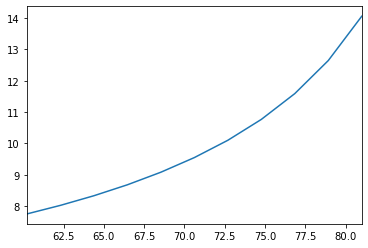

In [108]:
plt.plot(tt/np.pi*180, vv)
plt.margins(x=0)
plt.show()